<a href="https://colab.research.google.com/github/bawantha/ride_fare/blob/master/RideFarePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ride Fare Classification Project Competition**

In [66]:
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV    


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
pd.read_csv('train.csv')

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,correct


In [0]:
train_fare=pd.read_csv('train.csv')

In [0]:
test_fare=pd.read_csv('test.csv')

In [26]:
test_fare.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
1,213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
2,213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
3,213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
4,213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


In [27]:
train_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     17176 non-null  int64  
 1   additional_fare            16974 non-null  float64
 2   duration                   16974 non-null  float64
 3   meter_waiting              16974 non-null  float64
 4   meter_waiting_fare         16974 non-null  float64
 5   meter_waiting_till_pickup  16974 non-null  float64
 6   pickup_time                17176 non-null  object 
 7   drop_time                  17176 non-null  object 
 8   pick_lat                   17176 non-null  float64
 9   pick_lon                   17176 non-null  float64
 10  drop_lat                   17176 non-null  float64
 11  drop_lon                   17176 non-null  float64
 12  fare                       17039 non-null  float64
 13  label                      17176 non-null  obj

In [28]:
train_fare.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,1.717600e+04,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17176.000000,17176.000000,17039.000000
mean,2.014549e+08,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,6.968587,79.997534,312.655466
std,7.456830e+06,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,0.378669,0.359648,605.300565
min,1.891236e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,1.947619e+08,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,6.865625,79.870100,125.515000
50%,2.013582e+08,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,6.916160,79.899100,211.180000
75%,2.083081e+08,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,7.047195,79.960225,366.465000
max,2.138173e+08,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


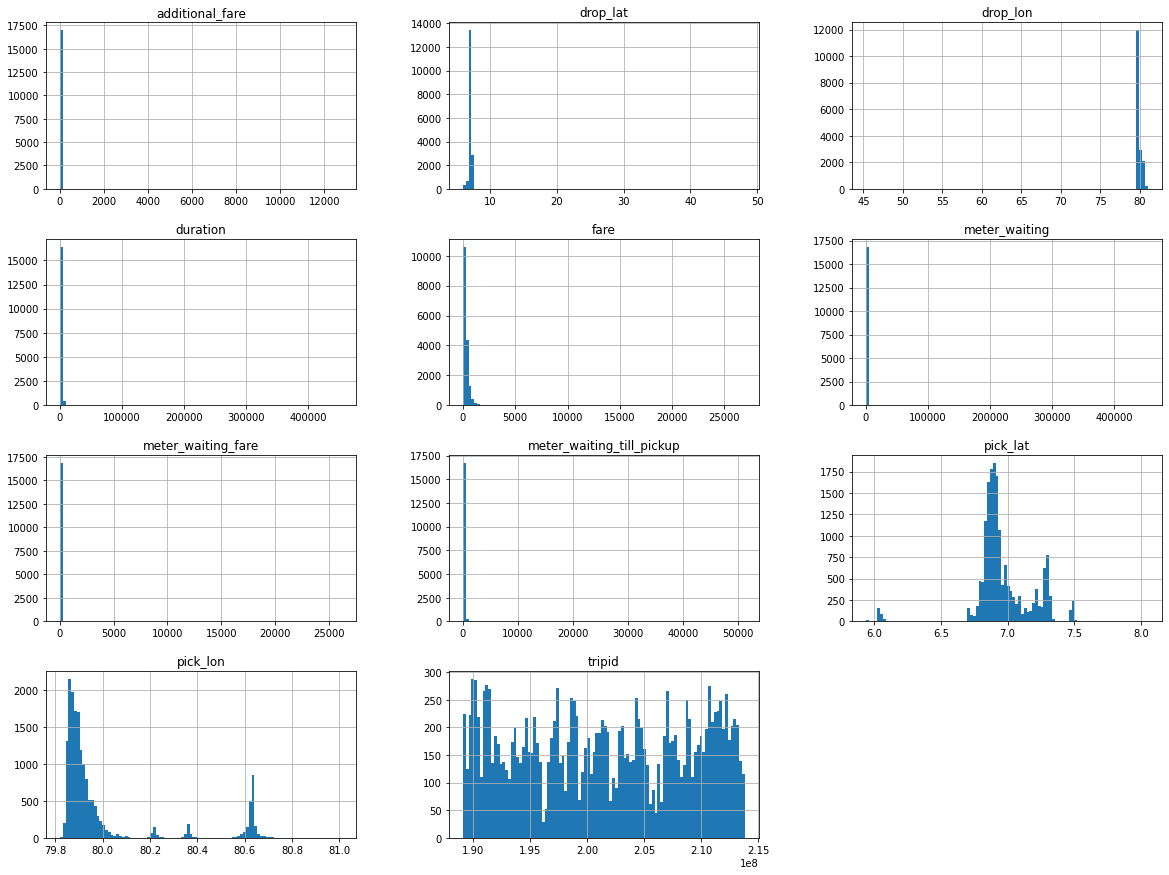

In [29]:

train_fare.hist(bins=100, figsize=(20,15))
train_fare.head()
plt.show()


In [30]:
train_fare.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [0]:
from sklearn import linear_model

In [32]:
train_fare.shape

(17176, 14)

In [33]:
train_fare.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [34]:
train_fare.dtypes

tripid                         int64
additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                         object
dtype: object

In [35]:
train_fare.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,1.717600e+04,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17176.000000,17176.000000,17039.000000
mean,2.014549e+08,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,6.968587,79.997534,312.655466
std,7.456830e+06,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,0.378669,0.359648,605.300565
min,1.891236e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,1.947619e+08,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,6.865625,79.870100,125.515000
50%,2.013582e+08,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,6.916160,79.899100,211.180000
75%,2.083081e+08,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,7.047195,79.960225,366.465000
max,2.138173e+08,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


In [36]:
train_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     17176 non-null  int64  
 1   additional_fare            16974 non-null  float64
 2   duration                   16974 non-null  float64
 3   meter_waiting              16974 non-null  float64
 4   meter_waiting_fare         16974 non-null  float64
 5   meter_waiting_till_pickup  16974 non-null  float64
 6   pickup_time                17176 non-null  object 
 7   drop_time                  17176 non-null  object 
 8   pick_lat                   17176 non-null  float64
 9   pick_lon                   17176 non-null  float64
 10  drop_lat                   17176 non-null  float64
 11  drop_lon                   17176 non-null  float64
 12  fare                       17039 non-null  float64
 13  label                      17176 non-null  obj

In [0]:
train_fare=train_fare.dropna(subset= ["additional_fare"])


In [38]:
train_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16974 entries, 0 to 17175
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     16974 non-null  int64  
 1   additional_fare            16974 non-null  float64
 2   duration                   16974 non-null  float64
 3   meter_waiting              16974 non-null  float64
 4   meter_waiting_fare         16974 non-null  float64
 5   meter_waiting_till_pickup  16974 non-null  float64
 6   pickup_time                16974 non-null  object 
 7   drop_time                  16974 non-null  object 
 8   pick_lat                   16974 non-null  float64
 9   pick_lon                   16974 non-null  float64
 10  drop_lat                   16974 non-null  float64
 11  drop_lon                   16974 non-null  float64
 12  fare                       16968 non-null  float64
 13  label                      16974 non-null  obj

In [39]:
train_fare.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
5,189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct


In [40]:
train_fare.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16974 entries, 0 to 17175
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     16974 non-null  int64  
 1   additional_fare            16974 non-null  float64
 2   duration                   16974 non-null  float64
 3   meter_waiting              16974 non-null  float64
 4   meter_waiting_fare         16974 non-null  float64
 5   meter_waiting_till_pickup  16974 non-null  float64
 6   pickup_time                16974 non-null  object 
 7   drop_time                  16974 non-null  object 
 8   pick_lat                   16974 non-null  float64
 9   pick_lon                   16974 non-null  float64
 10  drop_lat                   16974 non-null  float64
 11  drop_lon                   16974 non-null  float64
 12  fare                       16968 non-null  float64
 13  label                      16974 non-null  obj

In [0]:
train_fare['pickup_time'] =  pd.to_datetime(train_fare['pickup_time'], format='%m/%d/%Y %H:%M')
train_fare['drop_time'] =  pd.to_datetime(train_fare['drop_time'], format='%m/%d/%Y %H:%M')

In [0]:
train_fare['pickup_time_year']=train_fare['pickup_time'].dt.year
train_fare['pickup_time_month']=train_fare['pickup_time'].dt.month
train_fare['pickup_time_date']=train_fare['pickup_time'].dt.day
train_fare['pickup_time_day']=train_fare['pickup_time'].dt.dayofweek
train_fare['pickup_time_hour']=train_fare['pickup_time'].dt.hour
train_fare['pickup_time_minute']=train_fare['pickup_time'].dt.minute
train_fare['drop_time_year']=train_fare['drop_time'].dt.year
train_fare['drop_time_month']=train_fare['drop_time'].dt.month
train_fare['drop_time_date']=train_fare['drop_time'].dt.day
train_fare['drop_time_day']=train_fare['drop_time'].dt.dayofweek
train_fare['drop_time_hour']=train_fare['drop_time'].dt.hour
train_fare['drop_time_minute']=train_fare['drop_time'].dt.minute

In [49]:
train_fare.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,pickup_time_year,pickup_time_month,pickup_time_date,pickup_time_day,pickup_time_hour,pickup_time_minute,drop_time_year,drop_time_month,drop_time_date,drop_time_day,drop_time_hour,drop_time_minute
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,4,0,20,2019,11,1,4,0,34
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,4,0,56,2019,11,1,4,1,9
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,4,1,8,2019,11,1,4,1,26
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,4,2,27,2019,11,1,4,2,37
5,189129552,10.5,3407.0,182.0,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,4,5,38,2019,11,1,4,6,35


In [0]:
train_fare=train_fare.drop(columns="pickup_time")
train_fare=train_fare.drop(columns="drop_time")


In [56]:
train_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16974 entries, 0 to 17175
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     16974 non-null  int64  
 1   additional_fare            16974 non-null  float64
 2   duration                   16974 non-null  float64
 3   meter_waiting              16974 non-null  float64
 4   meter_waiting_fare         16974 non-null  float64
 5   meter_waiting_till_pickup  16974 non-null  float64
 6   pick_lat                   16974 non-null  float64
 7   pick_lon                   16974 non-null  float64
 8   drop_lat                   16974 non-null  float64
 9   drop_lon                   16974 non-null  float64
 10  fare                       16968 non-null  float64
 11  label                      16974 non-null  object 
 12  pickup_time_year           16974 non-null  int64  
 13  pickup_time_month          16974 non-null  int

In [58]:
train_fare["fare"].isnull().sum()

6

In [0]:
train_fare = train_fare.drop(train_fare[train_fare['fare'].isnull()].index, axis=0)

In [60]:
train_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16968 entries, 0 to 17175
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     16968 non-null  int64  
 1   additional_fare            16968 non-null  float64
 2   duration                   16968 non-null  float64
 3   meter_waiting              16968 non-null  float64
 4   meter_waiting_fare         16968 non-null  float64
 5   meter_waiting_till_pickup  16968 non-null  float64
 6   pick_lat                   16968 non-null  float64
 7   pick_lon                   16968 non-null  float64
 8   drop_lat                   16968 non-null  float64
 9   drop_lon                   16968 non-null  float64
 10  fare                       16968 non-null  float64
 11  label                      16968 non-null  object 
 12  pickup_time_year           16968 non-null  int64  
 13  pickup_time_month          16968 non-null  int

In [62]:
train_fare.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
pickup_time_year             0
pickup_time_month            0
pickup_time_date             0
pickup_time_day              0
pickup_time_hour             0
pickup_time_minute           0
drop_time_year               0
drop_time_month              0
drop_time_date               0
drop_time_day                0
drop_time_hour               0
drop_time_minute             0
dtype: int64

In [93]:
train_fare.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,pickup_time_year,pickup_time_month,pickup_time_date,pickup_time_day,pickup_time_hour,pickup_time_minute,drop_time_year,drop_time_month,drop_time_date,drop_time_day,drop_time_hour,drop_time_minute
count,1.696800e+04,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000
mean,2.014695e+08,10.331473,1034.905058,215.542337,8.227091,67.020677,6.965160,79.998018,6.968278,79.997108,312.657884,2019.339816,7.950024,15.858852,2.919731,13.802746,29.486150,2019.339934,7.948845,15.859795,2.921676,14.081978,29.411363
std,7.453627e+06,1.721619,553.222014,218.969489,11.936970,42.750661,0.210840,0.242832,0.380253,0.360503,606.372103,0.473661,5.002891,8.844015,1.940086,4.819490,17.286925,0.473700,5.003350,8.844116,1.940758,4.881727,17.381706
min,1.891236e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.947342e+08,10.500000,548.000000,33.000000,0.000000,26.000000,6.864830,79.870475,6.865580,79.870100,125.500000,2019.000000,1.000000,8.000000,1.000000,10.000000,15.000000,2019.000000,1.000000,8.000000,1.000000,11.000000,14.000000
50%,2.013928e+08,10.500000,1009.000000,123.000000,0.115600,73.000000,6.913970,79.898600,6.915940,79.899000,211.050000,2019.000000,11.000000,16.000000,3.000000,14.000000,29.000000,2019.000000,11.000000,16.000000,3.000000,14.000000,29.000000
75%,2.083314e+08,10.500000,1702.836987,351.000000,14.334400,112.489510,7.042698,79.956500,7.046555,79.960000,366.205000,2020.000000,12.000000,23.000000,5.000000,18.000000,45.000000,2020.000000,12.000000,23.000000,5.000000,18.000000,44.000000
max,2.138173e+08,13.721437,1702.836987,628.875000,32.045122,112.489510,8.051010,81.009600,48.132000,81.009700,26945.990000,2020.000000,12.000000,31.000000,6.000000,23.000000,59.000000,2020.000000,12.000000,31.000000,6.000000,23.000000,59.000000


In [88]:
Counter(train_fare['additional_fare']>13.721437)

Counter({False: 15749, True: 1219})

In [0]:
train_fare.loc[train_fare['additional_fare'] > 13.721437, 'additional_fare'] = 13.721437
train_fare.loc[train_fare['duration'] >1702.836987, 'duration'] = 1702.836987
train_fare.loc[train_fare['meter_waiting'] > 628.875000 	, 'meter_waiting'] = 628.875000
train_fare.loc[train_fare['meter_waiting_fare'] > 32.045122 	 	, 'meter_waiting_fare'] = 32.045122
train_fare.loc[train_fare['meter_waiting_till_pickup'] > 112.489510 	 	, 'meter_waiting_till_pickup'] = 112.489510



In [92]:
train_fare.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,pickup_time_year,pickup_time_month,pickup_time_date,pickup_time_day,pickup_time_hour,pickup_time_minute,drop_time_year,drop_time_month,drop_time_date,drop_time_day,drop_time_hour,drop_time_minute
count,1.696800e+04,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000
mean,2.014695e+08,10.331473,1034.905058,215.542337,8.227091,67.020677,6.965160,79.998018,6.968278,79.997108,312.657884,2019.339816,7.950024,15.858852,2.919731,13.802746,29.486150,2019.339934,7.948845,15.859795,2.921676,14.081978,29.411363
std,7.453627e+06,1.721619,553.222014,218.969489,11.936970,42.750661,0.210840,0.242832,0.380253,0.360503,606.372103,0.473661,5.002891,8.844015,1.940086,4.819490,17.286925,0.473700,5.003350,8.844116,1.940758,4.881727,17.381706
min,1.891236e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.947342e+08,10.500000,548.000000,33.000000,0.000000,26.000000,6.864830,79.870475,6.865580,79.870100,125.500000,2019.000000,1.000000,8.000000,1.000000,10.000000,15.000000,2019.000000,1.000000,8.000000,1.000000,11.000000,14.000000
50%,2.013928e+08,10.500000,1009.000000,123.000000,0.115600,73.000000,6.913970,79.898600,6.915940,79.899000,211.050000,2019.000000,11.000000,16.000000,3.000000,14.000000,29.000000,2019.000000,11.000000,16.000000,3.000000,14.000000,29.000000
75%,2.083314e+08,10.500000,1702.836987,351.000000,14.334400,112.489510,7.042698,79.956500,7.046555,79.960000,366.205000,2020.000000,12.000000,23.000000,5.000000,18.000000,45.000000,2020.000000,12.000000,23.000000,5.000000,18.000000,44.000000
max,2.138173e+08,13.721437,1702.836987,628.875000,32.045122,112.489510,8.051010,81.009600,48.132000,81.009700,26945.990000,2020.000000,12.000000,31.000000,6.000000,23.000000,59.000000,2020.000000,12.000000,31.000000,6.000000,23.000000,59.000000


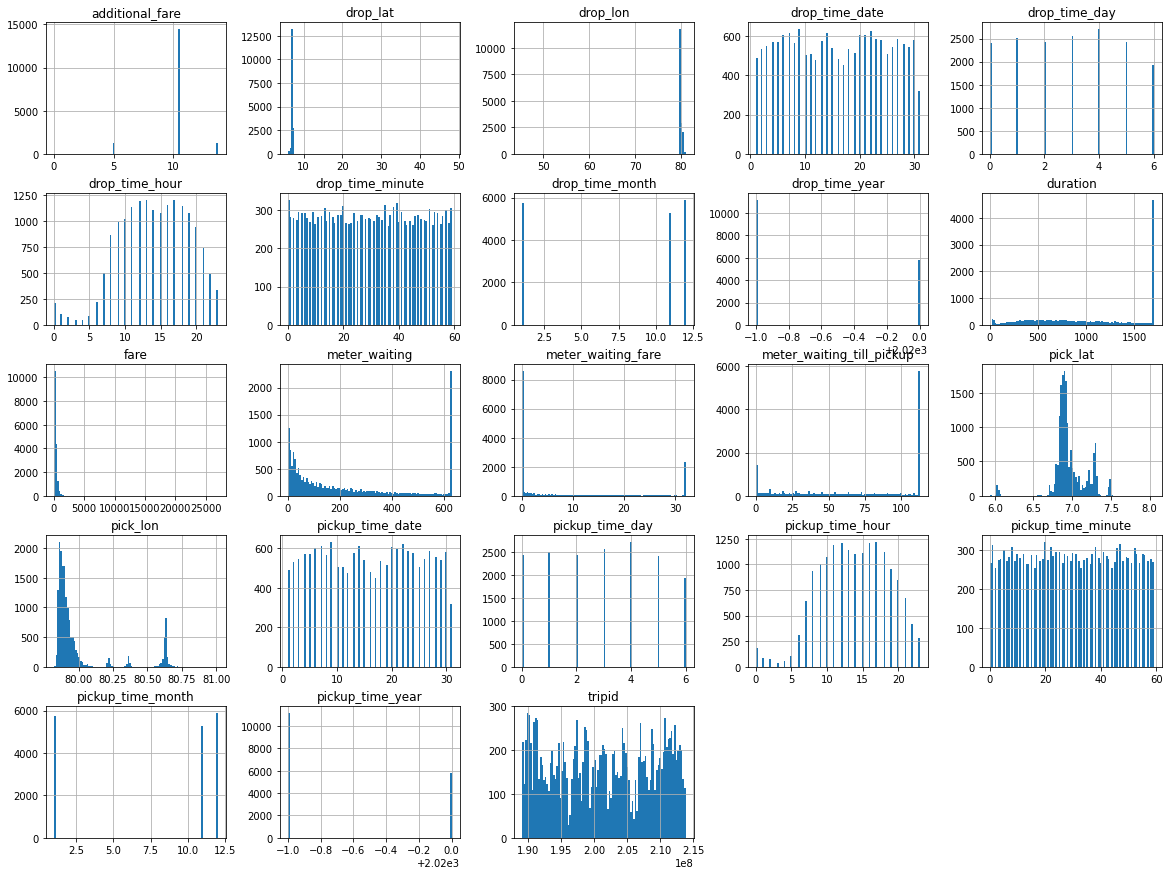

In [94]:
train_fare.hist(bins=100, figsize=(20,15))
train_fare.head()
plt.show()


In [0]:
train_fare.loc[train_fare['fare'] > 312.657884 	 	, 'fare'] = 312.657884

In [100]:
train_fare["fare"].sort_values(ascending=False)

4866     312.657884
13178    312.657884
8695     312.657884
3262     312.657884
8692     312.657884
            ...    
11687     51.600000
3833      50.750000
11990     50.720000
2753      50.630000
5908      50.480000
Name: fare, Length: 16954, dtype: float64

In [0]:
train_fare = train_fare.drop(train_fare[train_fare["fare"] == 0 ].index, axis=0)

In [99]:
train_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16954 entries, 0 to 17175
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     16954 non-null  int64  
 1   additional_fare            16954 non-null  float64
 2   duration                   16954 non-null  float64
 3   meter_waiting              16954 non-null  float64
 4   meter_waiting_fare         16954 non-null  float64
 5   meter_waiting_till_pickup  16954 non-null  float64
 6   pick_lat                   16954 non-null  float64
 7   pick_lon                   16954 non-null  float64
 8   drop_lat                   16954 non-null  float64
 9   drop_lon                   16954 non-null  float64
 10  fare                       16954 non-null  float64
 11  label                      16954 non-null  object 
 12  pickup_time_year           16954 non-null  int64  
 13  pickup_time_month          16954 non-null  int

In [104]:
train_fare[train_fare['drop_lon']<-180]
train_fare[train_fare['drop_lon']>180]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,pickup_time_year,pickup_time_month,pickup_time_date,pickup_time_day,pickup_time_hour,pickup_time_minute,drop_time_year,drop_time_month,drop_time_date,drop_time_day,drop_time_hour,drop_time_minute


In [105]:
train_fare.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
pickup_time_year             0
pickup_time_month            0
pickup_time_date             0
pickup_time_day              0
pickup_time_hour             0
pickup_time_minute           0
drop_time_year               0
drop_time_month              0
drop_time_date               0
drop_time_day                0
drop_time_hour               0
drop_time_minute             0
dtype: int64

In [0]:
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km


In [110]:
test_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8576 entries, 0 to 8575
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     8576 non-null   int64  
 1   additional_fare            8576 non-null   float64
 2   duration                   8576 non-null   int64  
 3   meter_waiting              8576 non-null   int64  
 4   meter_waiting_fare         8576 non-null   float64
 5   meter_waiting_till_pickup  8576 non-null   int64  
 6   pickup_time                8576 non-null   object 
 7   drop_time                  8576 non-null   object 
 8   pick_lat                   8576 non-null   float64
 9   pick_lon                   8576 non-null   float64
 10  drop_lat                   8576 non-null   float64
 11  drop_lon                   8576 non-null   float64
 12  fare                       8576 non-null   float64
dtypes: float64(7), int64(4), object(2)
memory usage:

In [111]:
test_fare.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,8.576000e+03,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000
mean,2.180067e+08,11.088095,1541.590485,508.502099,24.671655,119.863106,6.969246,80.008728,6.970008,80.010145,293.278057
std,2.789252e+06,5.359602,5952.458574,5784.005855,333.515641,793.233190,0.217809,0.251873,0.218826,0.252229,436.730282
min,2.132846e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.943130,79.817700,5.936600,79.818000,0.000000
25%,2.156247e+08,10.500000,540.000000,30.000000,0.000000,26.000000,6.864810,79.871600,6.864950,79.871300,126.077500
50%,2.179006e+08,10.500000,982.500000,116.000000,0.000000,72.000000,6.913605,79.900500,6.915460,79.902250,203.950000
75%,2.203904e+08,10.500000,1723.000000,336.250000,11.744200,138.000000,7.068875,79.963225,7.073505,79.967825,344.075000
max,2.228607e+08,160.500000,447230.000000,446934.000000,25760.361800,55571.000000,8.425010,80.776400,8.421730,80.805500,26844.330000


In [0]:
test_fare.loc[test_fare['additional_fare'] > 11.088095, 'additional_fare'] = 11.088095
test_fare.loc[test_fare['duration'] >1702.836987, 'duration'] = 1702.836987
test_fare.loc[test_fare['meter_waiting'] > 24.671655 	, 'meter_waiting'] = 24.671655
test_fare.loc[test_fare['meter_waiting_fare'] > 32.045122 	 	, 'meter_waiting_fare'] = 32.045122
test_fare.loc[test_fare['meter_waiting_till_pickup'] > 119.863106 	 	, 'meter_waiting_till_pickup'] = 119.863106


In [114]:
test_fare.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,213284604,10.5,924.000000,24.671655,2.4486,119.863106,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
1,213286352,10.5,1702.836987,20.000000,0.0000,91.000000,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
2,213293973,10.5,1552.000000,24.671655,2.6588,23.000000,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
3,213294622,10.5,462.000000,16.000000,0.0000,119.863106,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
4,213298687,10.5,814.000000,24.671655,12.3692,69.000000,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


In [0]:
test_fare['pickup_time'] =  pd.to_datetime(test_fare['pickup_time'], format='%m/%d/%Y %H:%M')
test_fare['drop_time'] =  pd.to_datetime(test_fare['drop_time'], format='%m/%d/%Y %H:%M')

In [0]:
test_fare['pickup_time_year']=test_fare['pickup_time'].dt.year
test_fare['pickup_time_month']=test_fare['pickup_time'].dt.month
test_fare['pickup_time_date']=test_fare['pickup_time'].dt.day
test_fare['pickup_time_day']=test_fare['pickup_time'].dt.dayofweek
test_fare['pickup_time_hour']=test_fare['pickup_time'].dt.hour
test_fare['pickup_time_minute']=test_fare['pickup_time'].dt.minute
test_fare['drop_time_year']=test_fare['drop_time'].dt.year
test_fare['drop_time_month']=test_fare['drop_time'].dt.month
test_fare['drop_time_date']=test_fare['drop_time'].dt.day
test_fare['drop_time_day']=test_fare['drop_time'].dt.dayofweek
test_fare['drop_time_hour']=test_fare['drop_time'].dt.hour
test_fare['drop_time_minute']=test_fare['drop_time'].dt.minute

In [0]:
test_fare=test_fare.drop(columns="pickup_time")
test_fare=test_fare.drop(columns="drop_time")


In [119]:
test_fare.shape

(8576, 23)

In [120]:
train_fare.shape

(16954, 24)

In [121]:
train_fare.info()
test_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16954 entries, 0 to 17175
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     16954 non-null  int64  
 1   additional_fare            16954 non-null  float64
 2   duration                   16954 non-null  float64
 3   meter_waiting              16954 non-null  float64
 4   meter_waiting_fare         16954 non-null  float64
 5   meter_waiting_till_pickup  16954 non-null  float64
 6   pick_lat                   16954 non-null  float64
 7   pick_lon                   16954 non-null  float64
 8   drop_lat                   16954 non-null  float64
 9   drop_lon                   16954 non-null  float64
 10  fare                       16954 non-null  float64
 11  label                      16954 non-null  object 
 12  pickup_time_year           16954 non-null  int64  
 13  pickup_time_month          16954 non-null  int

In [0]:
train_fare['distance'] = train_fare[['pick_lon','pick_lat','drop_lon','drop_lat']].apply(haversine,axis=1)
test_fare['distance'] = test_fare[['pick_lon','pick_lat','drop_lon','drop_lat']].apply(haversine,axis=1)


In [0]:
test_fare=test_fare.drop(columns="pick_lat")
test_fare=test_fare.drop(columns="pick_lon")
test_fare=test_fare.drop(columns="drop_lon")
test_fare=test_fare.drop(columns="drop_lat")

train_fare=train_fare.drop(columns="pick_lat")
train_fare=train_fare.drop(columns="pick_lon")
train_fare=train_fare.drop(columns="drop_lon")
train_fare=train_fare.drop(columns="drop_lat")





In [125]:
test_fare.info()
train_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8576 entries, 0 to 8575
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     8576 non-null   int64  
 1   additional_fare            8576 non-null   float64
 2   duration                   8576 non-null   float64
 3   meter_waiting              8576 non-null   float64
 4   meter_waiting_fare         8576 non-null   float64
 5   meter_waiting_till_pickup  8576 non-null   float64
 6   fare                       8576 non-null   float64
 7   pickup_time_year           8576 non-null   int64  
 8   pickup_time_month          8576 non-null   int64  
 9   pickup_time_date           8576 non-null   int64  
 10  pickup_time_day            8576 non-null   int64  
 11  pickup_time_hour           8576 non-null   int64  
 12  pickup_time_minute         8576 non-null   int64  
 13  drop_time_year             8576 non-null   int64

In [137]:
train_fare['lable_info']=test_fare.loc[test_fare['additional_fare'] > 11.088095, 'additional_fare'] = 11.088095



0        correct
1        correct
2        correct
3        correct
5        correct
          ...   
17171    correct
17172    correct
17173    correct
17174    correct
17175    correct
Name: label, Length: 16954, dtype: object

In [129]:
train_fare.nunique()

tripid                       16951
additional_fare                  5
duration                      1672
meter_waiting                  629
meter_waiting_fare            1910
meter_waiting_till_pickup      114
fare                          8757
label                            2
pickup_time_year                 2
pickup_time_month                3
pickup_time_date                31
pickup_time_day                  7
pickup_time_hour                24
pickup_time_minute              60
drop_time_year                   2
drop_time_month                  3
drop_time_date                  31
drop_time_day                    7
drop_time_hour                  24
drop_time_minute                60
distance                     16679
dtype: int64

fare


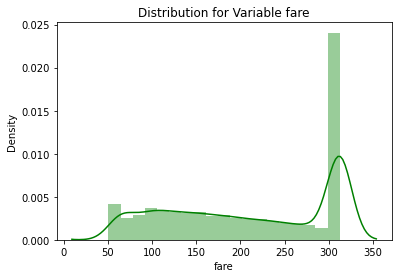

distance


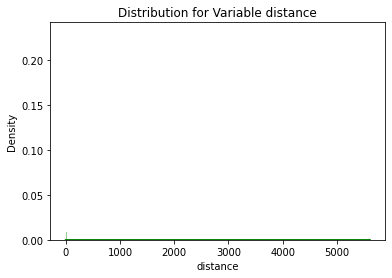

In [130]:
for i in ['fare', 'distance']:
    print(i)
    sns.distplot(train_fare[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [0]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train_fare.iloc[:, train_fare.columns != 'fare'], 
                         train_fare.iloc[:, 0], test_size = 0.20, random_state = 1)

In [134]:
print(X_train)
print(X_test)

          tripid  additional_fare  ...  drop_time_minute  distance
16958  213392029        10.500000  ...                34  3.169928
9778   203263582        10.500000  ...                27  5.613063
2590   192072595        10.500000  ...                47  2.231001
13454  209046430        10.500000  ...                42  3.585605
672    189969473        10.500000  ...                13  3.200788
...          ...              ...  ...               ...       ...
7946   200562124        10.500000  ...                22  4.912987
11114  205117295        10.500000  ...                45  3.971453
5307   196601260        10.500000  ...                35  1.941642
12343  207491522        13.721437  ...                39  7.262595
240    189385422        10.500000  ...                 3  1.423198

[13563 rows x 20 columns]
          tripid  additional_fare  ...  drop_time_minute   distance
13636  209407162             10.5  ...                49   1.410608
4550   195204158             10.5

ValueError: ignored

In [0]:
def f(row):
    if row['label'] == "correct":
        val = 1
    else:
        val = 0
    return val

In [0]:
train_fare['label_info'] =train_fare.apply(f,axis=1)

In [148]:
train_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16954 entries, 0 to 17175
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     16954 non-null  int64  
 1   additional_fare            16954 non-null  float64
 2   duration                   16954 non-null  float64
 3   meter_waiting              16954 non-null  float64
 4   meter_waiting_fare         16954 non-null  float64
 5   meter_waiting_till_pickup  16954 non-null  float64
 6   fare                       16954 non-null  float64
 7   label                      16954 non-null  object 
 8   pickup_time_year           16954 non-null  int64  
 9   pickup_time_month          16954 non-null  int64  
 10  pickup_time_date           16954 non-null  int64  
 11  pickup_time_day            16954 non-null  int64  
 12  pickup_time_hour           16954 non-null  int64  
 13  pickup_time_minute         16954 non-null  int

In [149]:
train_fare.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,pickup_time_year,pickup_time_month,pickup_time_date,pickup_time_day,pickup_time_hour,pickup_time_minute,drop_time_year,drop_time_month,drop_time_date,drop_time_day,drop_time_hour,drop_time_minute,distance,label_info
count,1.695400e+04,16954.000000,16954.000000,16954.000000,16954.000000,16954.000000,16954.000000,16954.000000,16954.000000,16954.000000,16954.00000,16954.000000,16954.000000,16954.000000,16954.000000,16954.000000,16954.000000,16954.000000,16954.000000,16954.000000,16954.0
mean,2.014745e+08,10.340004,1034.663648,215.499145,8.233884,67.004126,209.495856,2019.339979,7.948626,15.858912,2.91996,13.804707,29.488203,2019.340097,7.947446,15.859856,2.921906,14.083756,29.411761,4.853114,0.0
std,7.452131e+06,1.696526,553.113146,218.995511,11.939556,42.748469,91.019585,0.473716,5.003687,8.846244,1.94064,4.819152,17.286705,0.473755,5.004146,8.846346,1.941311,4.881568,17.380147,43.291948,0.0
min,1.891236e+08,5.000000,22.000000,0.000000,0.000000,0.000000,50.480000,2019.000000,1.000000,1.000000,0.00000,0.000000,0.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.947418e+08,10.500000,548.000000,33.000000,0.000000,26.000000,125.642500,2019.000000,1.000000,8.000000,1.00000,10.000000,15.000000,2019.000000,1.000000,8.000000,1.000000,11.000000,14.000000,1.485711,0.0
50%,2.013980e+08,10.500000,1009.000000,123.000000,0.116600,73.000000,211.235000,2019.000000,11.000000,16.000000,3.00000,14.000000,29.000000,2019.000000,11.000000,16.000000,3.000000,14.000000,29.000000,3.215441,0.0
75%,2.083328e+08,10.500000,1702.836987,351.000000,14.341800,112.489510,312.657884,2020.000000,12.000000,23.000000,5.00000,18.000000,45.000000,2020.000000,12.000000,23.000000,5.000000,18.000000,44.000000,6.146864,0.0
max,2.138173e+08,13.721437,1702.836987,628.875000,32.045122,112.489510,312.657884,2020.000000,12.000000,31.000000,6.00000,23.000000,59.000000,2020.000000,12.000000,31.000000,6.000000,23.000000,59.000000,5609.521440,0.0


In [151]:
train_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16954 entries, 0 to 17175
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     16954 non-null  int64  
 1   additional_fare            16954 non-null  float64
 2   duration                   16954 non-null  float64
 3   meter_waiting              16954 non-null  float64
 4   meter_waiting_fare         16954 non-null  float64
 5   meter_waiting_till_pickup  16954 non-null  float64
 6   fare                       16954 non-null  float64
 7   label                      16954 non-null  object 
 8   pickup_time_year           16954 non-null  int64  
 9   pickup_time_month          16954 non-null  int64  
 10  pickup_time_date           16954 non-null  int64  
 11  pickup_time_day            16954 non-null  int64  
 12  pickup_time_hour           16954 non-null  int64  
 13  pickup_time_minute         16954 non-null  int

In [0]:
train_fare=train_fare.drop(columns="label")

In [153]:
train_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16954 entries, 0 to 17175
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     16954 non-null  int64  
 1   additional_fare            16954 non-null  float64
 2   duration                   16954 non-null  float64
 3   meter_waiting              16954 non-null  float64
 4   meter_waiting_fare         16954 non-null  float64
 5   meter_waiting_till_pickup  16954 non-null  float64
 6   fare                       16954 non-null  float64
 7   pickup_time_year           16954 non-null  int64  
 8   pickup_time_month          16954 non-null  int64  
 9   pickup_time_date           16954 non-null  int64  
 10  pickup_time_day            16954 non-null  int64  
 11  pickup_time_hour           16954 non-null  int64  
 12  pickup_time_minute         16954 non-null  int64  
 13  drop_time_year             16954 non-null  int

In [0]:
X_train, X_test, y_train, y_test = train_test_split( train_fare.iloc[:, train_fare.columns != 'fare'], 
                         train_fare.iloc[:, 0], test_size = 0.20, random_state = 1)

In [163]:


print(X_train.shape)
print(X_test.shape)



(13563, 20)
(3391, 20)


In [0]:
fit_LR = LinearRegression().fit(X_train , y_train)

In [0]:
pred_train_LR = fit_LR.predict(X_train)

In [0]:
pred_test_LR = fit_LR.predict(X_test)

In [0]:


##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))



In [168]:


print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))



Root Mean Squared Error For Training data = 0.0
Root Mean Squared Error For Test data = 0.0


In [169]:
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

1.0

In [170]:
r2_score(y_test, pred_test_LR)

1.0